In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import glob
import numpy as np
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

# Exact Experiments

In [2]:
environments = [
    "Deterministic",
]

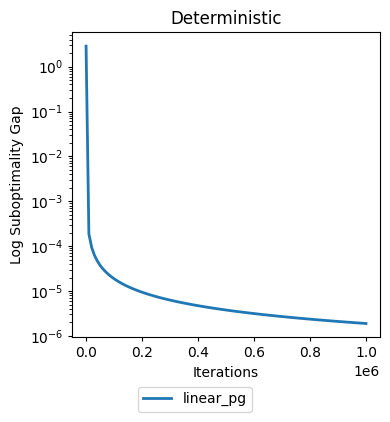

In [6]:
log_dir = "logs"
experiment_name = f"linear_pg"
path = f"{log_dir}/{experiment_name}"

fig, axes = plt.subplots(
    nrows=1, ncols=1, figsize=(4, 4), sharex=False, sharey=False, squeeze=False
)
for idx, (env, ax) in enumerate(zip(environments, axes.flat)):
    pathenv = f"{path}/{env}"

    log_files = glob.glob(f"{pathenv}/*.csv")
    assert len(log_files), f"No files in '{pathenv}/*.csv' found"
    for f in log_files:
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in glob.glob(f"{pathenv}/*.csv")),
            ignore_index=True,
        )

    line_plot = sns.lineplot(
        data=df, x="iteration", y="sub_opt_gap", hue="algo", ax=ax, linewidth=2.0
    )

    # remove legend in subplots
    line_plot.get_legend().remove()
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Log Suboptimality Gap")
    ax.set_yscale("log")
    ax.set_title(env)

# obtain the labels of the first subplot
# assume that all plots have the same labels
lines, labels = fig.axes[0].get_legend_handles_labels()

renamer = {
    "det_pg": "PG",
    "det_pg_entropy": "PG-E",
    "det_pg_entropy_multistage": "PG-E-MS",
}

labels = [renamer.get(label, label) for label in labels]

fig.legend(lines, labels, loc="lower center", ncol=9, bbox_to_anchor=[0.5, -0.06])
plt.tight_layout()
# plt.savefig("plots/pg_entropy_uniform.png", bbox_inches="tight", dpi=400)

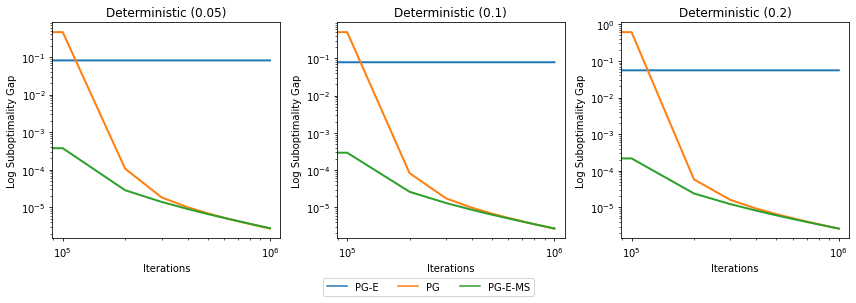

In [17]:
log_dir = "tests"
experiment_name = f"bad_init"
path = f"{log_dir}/{experiment_name}"

fig, axes = plt.subplots(
    nrows=1, ncols=3, figsize=(12, 4), sharex=False, sharey=False, squeeze=False
)
for idx, (env, ax) in enumerate(zip(environments, axes.flat)):
    pathenv = f"{path}/{env}"

    log_files = glob.glob(f"{pathenv}/*.csv")
    assert len(log_files), f"No files in '{pathenv}/*.csv' found"
    for f in log_files:
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in glob.glob(f"{pathenv}/*.csv")),
            ignore_index=True,
        )

    line_plot = sns.lineplot(
        data=df, x="iteration", y="sub_opt_gap", hue="algo", ax=ax, linewidth=2.0
    )

    # remove legend in subplots
    line_plot.get_legend().remove()
    ax.set_xlabel("Iterations")
    ax.set_xscale('log')
    ax.set_ylabel("Log Suboptimality Gap")
    ax.set_yscale("log")
    ax.set_title(env)

# obtain the labels of the first subplot
# assume that all plots have the same labels
lines, labels = fig.axes[0].get_legend_handles_labels()

renamer = {
    "det_pg": "PG",
    "det_pg_entropy": "PG-E",
    "det_pg_entropy_multistage": "PG-E-MS",
}

labels = [renamer.get(label, label) for label in labels]

fig.legend(lines, labels, loc="lower center", ncol=9, bbox_to_anchor=[0.5, -0.06])
plt.tight_layout()
plt.savefig("plots/pg_entropy_bad.png", bbox_inches="tight", dpi=400)

# Stochastic Experiments

## Uniform Initilization

In [ ]:
environments = [
    "Bernoulli (easy)",
    "Gaussian (easy)",
    "Beta (easy)",
    "Bernoulli (hard)",
    "Gaussian (hard)",
    "Beta (hard)",
]
log_dir = "logs"
experiment_name = f"uni_init"
path = f"{log_dir}/{experiment_name}"

In [ ]:
fig, axes = plt.subplots(
    nrows=2, ncols=3, figsize=(12, 8), sharex=False, sharey=False, squeeze=False
)
for idx, (env, ax) in enumerate(zip(environments, axes.flat)):
    pathenv = f"{path}/{env}"

    log_files = glob.glob(f"{pathenv}/*.csv")
    assert len(log_files), f"No files in '{pathenv}/*.csv' found"
    for f in log_files:
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in glob.glob(f"{pathenv}/*.csv")),
            ignore_index=True,
        )

    df = df.sort_values("algo")
    df_baseline = df[df["algo"].str.contains("entropy") == False]

    line_plot = sns.lineplot(
        data=df_baseline, x="iteration", y="sub_opt_gap", hue="algo", ax=ax, linewidth=2.0
    )

    # remove legend in subplots
    line_plot.get_legend().remove()
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Log Suboptimality Gap")
    ax.set_yscale("log")
    ax.set_title(env)

    n_lines = len(ax.lines) // 2
    for i in range(n_lines, 2 * n_lines):
        if "entropy" in ax.lines[i].get_label():
            ax.lines[i].set_linestyle("--")
            ax.lines[i - n_lines].set_linestyle("--")

# obtain the labels of the first subplot
# assume that all plots have the same labels
lines, labels = fig.axes[0].get_legend_handles_labels()

renamer = {
    "spg_ess": "SPG-ESS",
    "spg_gradient_step_size": "SPG-O-G",
    "spg_delta_step_size": "SPG-O-R",
    "spg_ess_eta_0_1_18": "SPG-ESS",
    "spg_entropy_multistage": "SPG-E-MS",
    "spg_multistage_ess": "SPG-ESS [D]",
    "spg_entropy_ess": "SPG-E-ESS",
}

labels = [renamer.get(label, label) for label in labels]

fig.legend(lines, labels, loc="lower center", ncol=9, bbox_to_anchor=[0.5, -0.06])
plt.tight_layout()
plt.savefig("plots/spg_uniform.png", bbox_inches="tight", dpi=400)

In [ ]:
fig, axes = plt.subplots(
    nrows=2, ncols=3, figsize=(12, 8), sharex=False, sharey=False, squeeze=False
)
for idx, (env, ax) in enumerate(zip(environments, axes.flat)):
    pathenv = f"{path}/{env}"

    log_files = glob.glob(f"{pathenv}/*.csv")
    assert len(log_files), f"No files in '{pathenv}/*.csv' found"
    for f in log_files:
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in glob.glob(f"{pathenv}/*.csv")),
            ignore_index=True,
        )

    df = df.sort_values("algo")
    df_baseline = df[df["algo"].str.contains("entropy") == False]
    df_entropy = df[df["algo"].str.contains("entropy") == True]
    df_plot = pd.concat([df_entropy, df_baseline])

    line_plot = sns.lineplot(
        data=df_plot, x="iteration", y="sub_opt_gap", hue="algo", ax=ax, linewidth=2.0
    )

    # remove legend in subplots
    line_plot.get_legend().remove()
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Log Suboptimality Gap")
    ax.set_yscale("log")
    ax.set_title(env)

    n_lines = len(ax.lines) // 2
    for i in range(n_lines, 2 * n_lines):
        if "entropy" in ax.lines[i].get_label():
            ax.lines[i].set_linestyle("--")
            ax.lines[i - n_lines].set_linestyle("--")

# obtain the labels of the first subplot
# assume that all plots have the same labels
lines, labels = fig.axes[0].get_legend_handles_labels()

renamer = {
    "spg_ess": "SPG-ESS",
    "spg_gradient_step_size": "SPG-O-G",
    "spg_delta_step_size": "SPG-O-R",
    "spg_ess_eta_0_1_18": "SPG-ESS",
    "spg_entropy_multistage": "SPG-E-MS",
    "spg_multistage_ess": "SPG-ESS [D]",
    "spg_entropy_ess": "SPG-E-ESS",
}

labels = [renamer.get(label, label) for label in labels]

fig.legend(lines, labels, loc="lower center", ncol=9, bbox_to_anchor=[0.5, -0.06])
plt.tight_layout()
plt.savefig("plots/spg_entropy_uniform.png", bbox_inches="tight", dpi=400)


## Bad Initialization

In [ ]:
environments = [
    "Bernoulli (easy)",
    "Gaussian (easy)",
    "Beta (easy)",
    "Bernoulli (hard)",
    "Gaussian (hard)",
    "Beta (hard)",
]
log_dir = "logs"
experiment_name = f"bad_init"
path = f"{log_dir}/{experiment_name}"

In [ ]:
fig, axes = plt.subplots(
    nrows=2, ncols=3, figsize=(12, 8), sharex=False, sharey=False, squeeze=False
)
for idx, (env, ax) in enumerate(zip(environments, axes.flat)):
    # path of all algorithm log of the environment
    pathenv = f"{path}/{env}"

    log_files = glob.glob(f"{pathenv}/*.csv")
    assert len(log_files), f"No files in '{pathenv}/*.csv' found"
    for f in log_files:
        df = pd.concat(
            (pd.read_csv(f, index_col=0) for f in glob.glob(f"{pathenv}/*.csv")),
            ignore_index=True,
        )

    df = df.sort_values("algo")
    df_baseline = df[df["algo"].str.contains("entropy") == False]
    df_entropy = df[df["algo"].str.contains("entropy") == True]
    df_plot = pd.concat([df_entropy, df_baseline])

    line_plot = sns.lineplot(
        data=df_plot, x="iteration", y="sub_opt_gap", hue="algo", ax=ax, linewidth=2.0
    )
    line_plot.get_legend().remove()
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Log Suboptimality Gap")
    ax.set_yscale("log")
    ax.set_title(env)

    n_lines = len(ax.lines) // 2
    for i in range(n_lines, 2 * n_lines):
        if "entropy" in ax.lines[i].get_label():
            ax.lines[i].set_linestyle("--")
            ax.lines[i - n_lines].set_linestyle("--")

# obtain the labels of the first subplot
# assume that all plots have the same labels
lines, labels = fig.axes[0].get_legend_handles_labels()

# rename legend labels from algorithm names to something more readable
renamer = {
    "spg_ess": "SPG-ESS",
    "spg_gradient_step_size": "SPG-O-G",
    "spg_delta_step_size": "SPG-O-R",
    "spg_ess_eta_0_1_18": "SPG-ESS",
    "spg_entropy_multistage": "SPG-E-MS",
    "spg_multistage_ess": "SPG-ESS [D]",
    "spg_entropy_ess": "SPG-E-ESS",
}

labels = [renamer.get(label, label) for label in labels]
fig.legend(lines, labels, loc="lower center", ncol=9, bbox_to_anchor=[0.5, -0.06])
plt.tight_layout()
plt.savefig("plots/spg_entropy_bad.png", bbox_inches="tight", dpi=400)